# Sect 40: Neural Networks - Intro to Deep Learning


## Questions/ Comments


## Learning Objectives

- Start By Discussing Biological Neural Networks (powerpoint)
- Connect back to introduction from Learn
- Demonstrate / play with Neural Network with Tensorflow Playground

# Artificial Neural Networks 

    
- **The purpose of a neural network is to model $\hat y \approx y$ by minimizing loss/cost functions using gradient descent.**

- Neural networks are very good with unstructured data. (images, audio)

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-neural-networks-online-ds-ft-100719/master/images/new_first_network_num.png" width=50%%>

- **Networks are comprised of sequential layers of neurons/nodes.**
    - Each neuron applies a **linear transformation** and an **activation function** and outputs its results to all neurons in the next layer.
    - Minimizing Loss functions by adjusting parameters (weights and bias) of each connection using gradient descent (forward and back propagation).

- **Activation functions** control the output of a neuron.($\hat y =f_{activation}(x)$ )
    - Most basic activation function is sigmoid functin ($\hat y =\sigma(x)$)
    - Choice of activation function controls the size/range of the output.
- **Linear transformations** ( $z = w^T x + b$ ) are used control the output of the activation function .
    - where $w^T $ is the weight(/coefficient), $x$ is the input, and  $b$ is a bias. 
        - weights: 
        - bias:
        
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg.png">



- **Loss functions** ($\mathcal{L}(\hat y, y) $)  measure inconsistency between predicted ($\hat y$) and actual $y$
    - will be optimized using gradient descent
    - defined over 1 traning sample
- **Cost functions** takes the average loss over all of the samples.
    - $J(w,b) = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})$
    - where $l$ is the number of samples


- **Forward propagation** is the calculating  loss and cost functions.
- **Back propagation** involves using gradient descent to update the values for  $w$ and $b$.
    - $w := w- \alpha\displaystyle \frac{dJ(w)}{dw}$ <br><br>
    - $b := b- \alpha\displaystyle \frac{dJ(b)}{db}$

        - where $ \displaystyle \frac{dJ(w)}{dw}$ and $\displaystyle \frac{dJ(b)}{db}$ represent the *slope* of the function $J$ with respect to $w$ and $b$ respectively
        - $\alpha$ denote the *learning rate*. 
        
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/neural_network_steps.png">

### A Note On Shapes

- Inputs:
    - $n$: Number of inputs (columns) in the feature vector 
    - $l$: Number of items (rows) in the training set 
    - $m$: Number of items (rows) in the test set
    
- Input X:
    - Will have shape $n$ x $l$ (number of features x number of training data points/rows)

### Using the chain rule for updating parameters with sigmoid activation function example:
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg_deriv.png" >
- $\displaystyle \frac{dJ(w,b)}{dw_i} = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1} \frac{d\mathcal{L}(\hat y^{(i)}, y^{(i)})}{dw_i}$
 
 
- For each training sample $1,...,l$ you'll need to compute:

    - $ z^{(i)} = w^T x^ {(i)} +b $

    - $\hat y^{(i)} = \sigma (z^{(i)})$

    - $dz^{(i)} = \hat y^{(i)}- y^{(i)}$

- Then, you'll need to make update:

    - $J_{+1} = - [y^{(i)} \log (\hat y^{(i)}) + (1-y^{(i)}) \log(1-\hat y^{(i)})$ (for the sigmoid function)

    - $dw_{1, +1}^{(i)} = x_1^{(i)} * dz^{(i)}$

    - $dw_{2, +1}^{(i)} = x_2^{(i)} * dz^{(i)}$

    - $db_{+1}^{(i)} =  dz^{(i)}$

    - $\dfrac{J}{m}$, $\dfrac{dw_1}{m}$, $\dfrac{dw_1}{m}$, $\dfrac{db}{m}$

- After that, update: 

    $w_1 := w_1 - \alpha dw_1$

    $w_2 := w_2 - \alpha dw_2$

    $b := b - \alpha db$

    repeat until convergence!
    
    

## Activation Functions (will call $f_a$ here)

- **sigmoid:**<br><img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/index_files/index_33_1.png" width=200>
    - $ f_a=\dfrac{1}{1+ \exp(-z)}$
    - outputs 0 to +1
    
- **tanh (hyperbolic tan):**<br><img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/index_files/index_36_1.png" width=200> <br>(Note:title is incorrect)
    - $f_a = =\dfrac{\exp(z)- \exp(-z)}{\exp(z)+ \exp(-z)}$
    - outputs -1 to +1
    - Generally works well in intermediate layers
    - one of most popular functions
    
- **arctan**<br><img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/index_files/index_40_1.png" width=200>
    -  similar qualities as tanh, but slope is more gentle than tanh
    - outputs ~ 1.6 to 1.6
    
-  **Rectified Linear Unit (relu):**<br><img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/index_files/index_43_1.png" width=200>
    - most popular activation function
    - Activation is exactly 0 when Z <0
    - Makes taking directives slightly cumbersome
    - $f_a=\max(0,z)$
- **leaky_relu:**<br><img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/index_files/index_46_1.png" width=200>
    -  altered version of relu where the activatiom is slightly negative when $z<0$
    - $f_a=\max(0.001*z,z)$

### Additional Resources
 - Good summary article with helpful visuals:
    - https://towardsdatascience.com/multi-layer-neural-networks-with-sigmoid-function-deep-learning-for-rookies-2-bf464f09eb7f 
- Interactive Visualizer for Activation Functions
    - https://dashee87.github.io/deep%20learning/visualising-activation-functions-in-neural-networks/
    
 ### Section Summary:
 - Compared to more tradistional statistics and ML techniques, neural networks perform particulary well when using unstructured data
 - Apart from densely connected networks, otyher types of neural networks include convolutional neural networks, recurrent neural networks, and generative adversarial neural networks.
 - When working with image data, it's important to understand how image data is stored when working with them in Python
- Single Layer Neural Network with a sigmoid activation function very similar to logistic regression.
- Backward and forward propagation are used to estimate the so-called "model weights"
- Adding more layers to neural networks can substantially increase model performance
- Several activations can be used in model nodes, you can explore with different types and evaluate how it affects performance

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# # q
# def sigmoid(x, derivative=False):
#     f = 1 / (1 + np.exp(-x))
#     if (derivative == True):
#         return f * (1 - f)
#     return f

# def tanh(x, derivative=False):
#     f = np.tanh(x)
#     if (derivative == True):
#         return (1 - (f ** 2))
#     return np.tanh(x)

# def relu(x, derivative=False):
#     f = np.zeros(len(x))
#     if (derivative == True):
#         for i in range(0, len(x)):
#             if x[i] > 0:
#                 f[i] = 1  
#             else:
#                 f[i] = 0
#         return f
#     for i in range(0, len(x)):
#         if x[i] > 0:
#             f[i] = x[i]  
#         else:
#             f[i] = 0
#     return f

# def leaky_relu(x, leakage = 0.05, derivative=False):
#     f = np.zeros(len(x))
#     if (derivative == True):
#         for i in range(0, len(x)):
#             if x[i] > 0:
#                 f[i] = 1  
#             else:
#                 f[i] = leakage
#         return f
#     for i in range(0, len(x)):
#         if x[i] > 0:
#             f[i] = x[i]  
#         else:
#             f[i] = x[i]* leakage
#     return f

# def arctan(x, derivative=False):
#     if (derivative == True):
#         return 1/(1+np.square(x))
#     return np.arctan(x)



# def plot_activation(fn):
#     z = np.arange(-10, 10, 0.2)
#     y = fn(z)
#     dy = fn(z, derivative=True)
#     fig,ax=plt.subplots(figsize=(6,4))
#     ax.set_title(f'{fn.__name__}')
#     ax.set(xlabel='Input',ylabel='Output')
#     ax.axhline(color='gray', linewidth=1,)
#     ax.axvline(color='gray', linewidth=1,)
#     ax.plot(z, y, 'r', label='original (y)')
#     ax.plot(z, dy, 'b', label='derivative (dy)')
#     ax.legend();
#     plt.show()
# ## Plot activation functions
# act_funcs = [sigmoid,tanh,arctan,relu,leaky_relu]
# [plot_activation(fn) for fn in act_funcs]
  

# Deeper Neural Networks:


       
- **Advantages:**
    - largely eliminates need for feature engineering
    - multiple levels of information processing in one networking.
        - Ex: for images:
            - First layer detects edges
            - second layer gorups edges and detects patterns
            - more layers group even bigger parts together
        - Ex: for audio:
            - first layer: low level wave features
            - second: basic units of sounds ("phonemes")
            - third: word recognition
            - fourth: sentence recognition
    
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/figures/small_deeper.png">

- Networks are comprised of sequential layers of neurons/nodes.
    - \# of layers = hidden+output layer
        - The input layer is not counted as formal layer.
    - All layers except the final are _hidden layers_.


## NOTATION:
Generally, the output of layer $j$ is denoted as $a^{[j]}$.

**For our 2-layer neural network above, this means that:**

- $x = a^{[0]}$  as x is what comes out of the input layer
- $a^{[1]} = \begin{bmatrix} a^{[1]}_1  \\ a^{[1]}_2 \\ a^{[1]}_3  \\\end{bmatrix}$ is the value generated by the hidden layer
- $\hat y =  a^{[2]}$, the output layer will generate a value $a^{[2]}$, which is equal to $\hat y$.


<br>For the **first node** in the hidden layer:
- The linear transformation that occurs is:  $ z^{[1]}_1 = w^{[1]}_1 x +b^{[1]}_1$,
    - Where $w$ = the weight, and $b$ = bias

- For **all nodes** in the hidden layer:
    - $ z^{[1]}_1 = w^{[1]}_1 x +b^{[1]}_1$ and  $a^{[1]}_1= f(z^{[1]}_1)$

    - $ z^{[1]}_2 = w^{[1]}_2 x +b^{[1]}_2$ and $a^{[1]}_2= f(z^{[1]}_2)$

    - $ z^{[1]}_3 = w^{[1]}_3 x +b^{[1]}_3$ and $a^{[1]}_3= f(z^{[1]}_3)$

The **dimensions** of the elements:

- $w^{[1]} = \begin{bmatrix} w^{[1]}_{1,1}  & w^{[1]}_{2,1} & w^{[1]}_{3,1}  \\ w^{[1]}_{1,2}  & w^{[1]}_{2,2} & w^{[1]}_{3,2}\end{bmatrix}$
    - where, eg. $w^{[1]}_{1,2}$ denotes the weight of the arrow going **from $x_2$ into the first node** of the hidden layer. 


- When multiplying the transpose of this matrix (making it a 2 x 3 matrix) 
    - $w^{[1]T}_1$ with $x = \begin{bmatrix} x_1  \\x_2\end{bmatrix}$ and add $b^{[1]} = \begin{bmatrix} b^{[1]}_1  \\b^{[1]}_2 \\ b^{[1]}_3 \end{bmatrix}$,
    - we obtain $z^{[1]} = \begin{bmatrix} z^{[1]}_1  \\z^{[1]}_2 \\ z^{[1]}_3 \end{bmatrix}$.

----

- The activation function is   $a^{[1]}_1= f(z^{[1]}_1)$.
$w^{[1]}_{1,2}$

$w^{[1]} = \begin{bmatrix} w^{[1]}_{1,1}  & w^{[1]}_{2,1} & w^{[1]}_{3,1}  \\ w^{[1]}_{1,2}  & w^{[1]}_{2,2} & w^{[1]}_{3,2}\end{bmatrix}$ 

[Reminder: $x = \begin{bmatrix} x_1  \\x_2\end{bmatrix} \equiv a^{[0]}$ and that $a^{[2]} = \hat y$ ]

- Then, given input $x$:

    - $z^{[1]} = w^{[1]T} a^{[0]} + b^{[1]}$

    - $a^{[1]} = f(z^{[1]})$

    - $z^{[2]} = w^{[2]T} a^{[1]} + b^{[2]}$

    - $a^{[2]} = f(z^{[1]})$
    
    
- When adding in several training samples ($i$), these become:
    - $z^{[1](i)} = w^{[1]T} a^{[0](i)} + b^{[0]}$

    - $a^{[1](i)} = f(z^{[1](i)})$

    - $z^{[2](i)} = w^{[2]T} a^{[1](i)} + b^{[2]}$

    - $a^{[2](i)} = f(z^{[1](i)})$
    
    
### Process Summary
- We begin by defining a model architecture which includes the number of hidden layers, activation functions (sigmoid or relu) and the number of units in each of these.  
- We then initialize parameters for each of these layers (typically randomly). After the initial parameters are set, forward propagation evaluates the model giving a prediction, which is then used to evaluate a cost function. Forward propogation involves evaluating each layer and then piping this output into the next layer. 
- Each layer consists of a linear transformation and an activation function.  The parameters for the linear transformation in **each** layer include $W^l$ and $b^l$. The output of this linear transformation is represented by $Z^l$. This is then fed through the activation function (again, for each layer) giving us an output $A^l$ which is the input for the next layer of the model.  
- After forward propogation is completed and the cost function is evaluated, backpropogation is used to calculate gradients of the initial parameters with respect to this cost function. Finally, these gradients are then used in an optimization algorithm, such as gradient descent, to make small adjustments to the parameters and the entire process of forward propogation, back propogation and parameter adjustments is repeated until the modeller is satisfied with the results.


### Parameter Summary (Deep Networks Lesson):
Notation for when there are $L$ layers present (and $l$ is current layer)

**Parameters for the linear transformation: **  

$W^{[l]}: (n^{[l]}, n^{[l-1]})$

$b^{[l]}: (n^{[l]}, 1)$

$dW^{[l]}: (n^{[l]}, n^{[l-1]})$

$db^{[l]}: (n^{[l]}, 1)$

**Parameters for the activation function**  

$ a^{[l]}, z^{[l]}: (n^{[l]}, 1)$

$ Z^{[l]}, A^{[l]}: (n^{[l]}, m)$

$ dZ^{[l]}, dA^{[l]}: (n^{[l]}, m)$



### Forward propagation:
- Process: 
    - evaluating a cost function associated with the output of the neural network by successively calculating the output of each layer given initial parameter values, and passing this output on to the next layer until a finalized output has been calculated and the cost function can then be evaluated..
        - Input is $a^{[l-1]}$
        - Output $a^{[l]}$, save $z^{[l]}, w^{[l]}, b^{[l]}, a^{[l-1]} $
    
- $Z^1$ is the output of the linear transformation of the initial input $A^1$ (the observations).
- In successive layers, $A^l$ is the output from the previous hidden layer. 
- In all of these cases, $W^l$ is a matrix of weights to be optimized minimize the cost function. $b^l$ is also optimized but is a vector as opposed to a matrix.  

- $g^l$ is the activation function which takes the output of this linear transformation and yields the input to the next hidden layer.  
- $ Z^{[l]}= W^{[l]} A^{[l-1]} + b^{[l]}$

- $ A^{[l]}= g^{[l]} ( Z^{[l]})$

- Shape: here, $ Z^{[l]}, A^{[l]}$ both have a shape of $(n^{[l]}, m)$

    - where $n$ the nodes in the layer $l$
    
    
### Backward Propagation:
- Once an output for the neural network given the current parameter weights has been calculated, we must back propogate to calculate the gradients of layer parameters with respect to the cost function.
    - This will allow us to apply an optimization algorithm such as gradient descent in order to make small adjustments to the parameters in order to minimize our cost (and improve our predictions).
    - Input $da ^{[l]}$
    - Output $da^{[l-1]}$, $dW^{[l]}, db^{[l]}$


- **The gradients for our respective parameters are given by:**
   
    - $ dZ^{[l]}= dA ^{[l]} * g^{[l]'} (Z^{[l]})$

    - $ dW^{[l]} = \dfrac{1}{m} dZ^{[l]}* A^{[l-1]T}$

    - $ db^{[l]} = \dfrac{1}{m} np.sum(dZ^{[l]}, axis=1, keepdims=True)$

    - $ dA^{[l-1]} = W^{[l]T}*dZ^{[l]}$

# END OF STUDY GROUP [?]

# Intro to Keras


## Keras Basics
- Tensors dimensions:
    - Scalars = 0D tensors
    - Vectors = 1D tensors
    - Matrices = 2D tensors
    - 3D tensors
- A tensor is defined by 3 characteristics:
    - rank or number of axes
    - the shape
    - the data type
- Tensor basics - properties (from [here](https://pgaleone.eu/tensorflow/2018/07/28/understanding-tensorflow-tensors-shape-static-dynamic/#tensors-the-basic)):
    - name
    - type:
        - tf.float32, tf.int64, tf.string
    - rank:
        - the number of dimension or the tensor. 
        - scalar = 0, vector = 1, etc.
    - shape:

## Important Data Manipulations in numpy

- **Unrowing matrices:**
    - e.g. turning a matrix of 790 images, which are 64 x 64 pixels and in RBG (3 colors) a (790, 64, 64, 3) matrix  into a matrix with 1 row for each image a ( 64*64*3, 790) matrix
    - img_unrow = img.reshape(790, -1).T
        - reshape -1 essentially means "figure out how many, based upon the dat'
- **Increasing the rank:**
    - Vector with `np.shape()` returns  `(790,)`
    - `np.reshape(vector, (1, 790))`
- **Tensor indexling/slicing**
    - just as python, `tensor[start_idx : end_idx]`
    - left inclusive, right exclusive

Using TensorFlow backend.


Raw Tensor shape: (60000, 28, 28)
Tensor Slice [0:100] shape: (100, 28, 28)
Tensor Slice [0:100] shape: (100, 28, 28)
Tensor Slice [0:100] shape: (100, 28, 28)


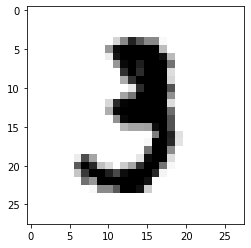

In [1]:
# Tensor indexing example using images
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline  

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[10] #Select an arbitrary case for our example

#Checking the shape of our tensor (in this case, the image)
print('Raw Tensor shape:', train_images.shape)

#Now performing some slices of our image:
print('Tensor Slice [0:100] shape:', train_images[:100].shape)

#Equivalently
print('Tensor Slice [0:100] shape:', train_images[:100, :, :].shape)

#Or verbosely:
print('Tensor Slice [0:100] shape:', train_images[:100, :28, :28].shape)


plt.imshow(digit, cmap=plt.cm.binary) #Display an example image for context
plt.show()


Sliced tensor shape (includes all images but only the lower right hand corner of each: (60000, 14, 14)


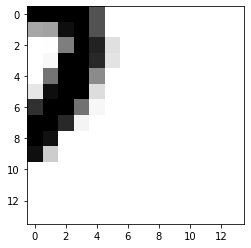

In [2]:
# In the above example, we sliced our tensor to obtain 100 of the 60,000 images. 
# You can also slice tensors along other axes. For example, 
# the 1st dimension is which image we are referring two,
# while the 2nd and 3rd axis are the pixels of these images themselves.
# For example, we could limit the images to the bottom right hand quadrant like this:
lower_right_quadrant = train_images[:,14:,14:]
print('Sliced tensor shape (includes all images but only the lower right hand corner of each:',
      lower_right_quadrant.shape)
plt.imshow(lower_right_quadrant[10], cmap=plt.cm.binary) #Display the 10th image from our sliced tensor.
plt.show()

## Tensor Operations
- **Element-wise**
    - each element from one tensor added/etc to the corresponding elements
- **Broadcasting**
    - used for tensors of different dimensions
    - in example below, when adding a (3,) vector to a (4,3) matrix, a copy of the vector is added to each row.

In [3]:
# Example Broadcasting
import numpy as np
A=np.array([[ 0,  1,  2],
 [ 3,  4,  5],
 [ 6,  7,  8],
 [ 9, 10, 11]] )
print(f'A - (shape{np.shape(A)}):\n',A)
B = np.array([1, 2, 3 ])
print(f'\nB -  (shape{np.shape(B)}):\n',B)
# Broadcasting B to add to A
A += B
print(f'\nUpdated A:\n',A)

A - (shape(4, 3)):
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

B -  (shape(3,)):
 [1 2 3]

Updated A:
 [[ 1  3  5]
 [ 4  6  8]
 [ 7  9 11]
 [10 12 14]]


- **Tensor dot:**
    - taking the dot product as in linear algebra
    - a sum of element-wise products

In [4]:
# Simple dot product 
B = np.array([1,2,3])
print(f'B-  {np.shape(B)}:\n',B)

#Taking the dot product of B and itself is equivalent to
#1*1 + 2*2 + 3*3 = 1 + 4 + 9 = 14
BdotB = np.dot(B,B)
print(f'\nB.B - {np.shape(BdotB)}:\n',BdotB)
# np.

B-  (3,):
 [1 2 3]

B.B - ():
 14


In [5]:
# More complicated example
# Here the first element is the sum of the first row of A multiplied by B elementwise:  
## 0*1 + 1*2 + 2*3 = 0 + 2 + 6 = 8  
# Followed by the sum of the second row of A multiplied by B elementwise:  
## 3*1 + 4*2 + 5*3 = 3 + 8 + 15 = 26
# and so on.
A = np.array(range(12)).reshape(4,3)
print('A:\n', A, '\n')

B = np.array([1,2,3])#.reshape(1, -1)
print('B:', B, '\n')

np.dot(A, B)

A:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

B: [1 2 3] 



array([ 8, 26, 44, 62])

# Basics of Building a Neural Network with Keras:


**Basics of Building a Neural Network with Keras:**
1. Import required modules
2. Decide on a network architecture (have only discussed sequential thus far)
3. Adding layers - specifying layer type, number of neurons, activation functions, and, optionally, the input shape.
4. Compile the model:
    - Specify optimiziers
    - specify loss functions
    - specify metrics

In [6]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(10, activation = 'relu', input_shape=(64*64*3, 790 )))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse',metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


5. Training the model
    - `model.fit(X_train, y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))`
    
    - **batches:**
        - a set of N samples, processed independently in parallel
        - a batch determines how many samples are fed through before back-propagation. 
        - model only updates after a batch is complete.
        - ideally have as large of a batch as your hardware can handle without going out of memory.
            - larger batches usually run faster than smaller ones for evaluation/prediction. 
    - **epoch:**
        - arbitrary cutoff / "one pass over the entire dataset", useful for logging and periodic evaluation
        - when using kera's `model.fit` parameters `validation_data` or `validation_split`, these evaluations run at the end of every epoch.
        - Within Keras can add callbacksto be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).
        
    - **`history =  model.fit()` creates history object with .history attribute.**
        - `history.history()` returns a dictionary of metrics from each epoch. 
            - `history.history['loss']` and `history.history['acc']`
            


In [8]:
# # Fitting the model
# history = model.fit(train_images,train_labels, epochs=20,
#                     batch_size=10, validation_data=(test_images, test_labels))

### Additional Keras - Getting Started Links:
* https://keras.io/getting-started/
* https://keras.io/getting-started/sequential-model-guide/#compilation
* https://www.coursera.org/learn/deep-neural-network/lecture/BhJlm/rmsprop
* https://www.coursera.org/learn/deep-neural-network/lecture/qcogH/mini-batch-gradient-descent
* A full book on Keras by the author of Keras himself:  
    https://www.manning.com/books/deep-learning-with-python

# Using Keras for Text Analysis


## Preprocessing Text with Keras
[Link for Learn.co Keras Lab](https://github.com/jirvingphd/dsc-04-41-05-keras-lab-online-ds-ft-021119/tree/solution)

- The Keras Lab uses a neural network to analyze the text inside of filed bank complaints.
- The complaint's text preprocessing in this lab involves several steps:
    1. create word vector counts ( a bag of words types of representation)
    2. Change category labels to integers
    3. Train-test-split the processed text.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Keras preprocessing
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

# Keras neural network basics
from keras import models
from keras import layers
from keras import optimizers


# Load in data
data_url = 'https://raw.githubusercontent.com/jirvingphd/dsc-04-41-05-keras-lab-online-ds-ft-021119/solution/Bank_complaints.csv'
df = pd.read_csv(data_url)
df.head()

In [ ]:
# Step 1. create word vector counts

complaints = df["Consumer complaint narrative"] 
tokenizer = Tokenizer(num_words=2000) #Initialize a tokenizer.

tokenizer.fit_on_texts(complaints) #Fit it to the complaints

sequences = tokenizer.texts_to_sequences(complaints) #Generate sequences
print('sequences type:', type(sequences))

In [ ]:
one_hot_results= tokenizer.texts_to_matrix(complaints, mode='binary') #Similar to sequences, but returns a numpy array
print('one_hot_results type:', type(one_hot_results))

word_index = tokenizer.word_index #Useful if we wish to decode (more explanation below)

print('Found %s unique tokens.' % len(word_index)) #Tokens are the number of unique words across the corpus


print('Dimensions of our coded results:', np.shape(one_hot_results)) #Our coded data

In [ ]:
reverse_index = {v:k for k,v in word_index.items()}
comment_idx_to_preview = 19
print('Original complaint text:')
print(complaints[comment_idx_to_preview])
print('\n\n')

#The reverse_index cell block above must be complete in order for this cell block to successively execute.
decoded_review = ' '.join([reverse_index.get(i) for i in sequences[comment_idx_to_preview]])
# print('Decoded review from Tokenizer:')
# print(decoded_review)

In [ ]:
# Step 2: conveting descriptive categories into integers

product = df["Product"]

le = preprocessing.LabelEncoder() #Initialize. le used as abbreviation fo label encoder
le.fit(product)
# print("Original class labels:")
# print(list(le.classes_))
# print('\n')
product_cat = le.transform(product)  
#list(le.inverse_transform([0, 1, 3, 3, 0, 6, 4])) #If you wish to retrieve the original descriptive labels post production

# print('New product labels:')
# print(product_cat)
# print('\n')

# print('One hot labels; 7 binary columns, one for each of the categories.') #Each row will be all zeros except for the category for that observation.
product_onehot = to_categorical(product_cat)
# print(product_onehot)
# print('\n')
# print('One hot labels shape:')
# print(np.shape(product_onehot))

# Step 3. Train-test-split
import random
random.seed(123)
test_index = random.sample(range(1,10000), 1500)

test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)
label_test = product_onehot[test_index]
label_train = np.delete(product_onehot, test_index, 0)

print("Test label shape:", np.shape(label_test))
print("Train label shape:", np.shape(label_train))
print("Test shape:", np.shape(test))
print("Train shape:", np.shape(train))

In [ ]:
# Building neural network
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) 
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax')) # output layer with units = # of classes

# Compil the network
model.compile(optimizer='SGD', loss='categorical_crossentropy',metrics=['accuracy'])

## Building/Compilng the neural network
- For neural network:
    - Use 2 hidden layers with the relu activation. layer one =50 units, layer two= 25
    - **Becuase we are doing  multiclass (7 classes) problem, our final layer will use a softmax classifier to output 7 class probabilities per case.**

- For compiling then model:
    -  Loss function: 'categorical_crossentropy`
    - Optimizer: stochastic gradient descent 'SGD'
    - metric: 'accuracy'
    
- Fit fitting:
    - Use 120 epochs
    - use 256 batch size

In [ ]:
history = model.fit(train,
                    label_train,
                    epochs=120,
                    batch_size=256)

## Visualizing and Evaluating Results

In [ ]:
# Plotting the results from history
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['acc']
# If we used a validation_set, could also plot:
# val_acc_values = history_dict['val_acc']
# val_loss_values = history_dict['val_loss']



epochs = range(1, len(loss_values) + 1)
fig,ax = plt.subplots(2,1, sharex=True, figsize=(6,6))
ax[0].set_title('Training Results')
ax[0].plot(epochs, loss_values, 'g', label='Training loss')
# ax[0].plot(epochs, val_loss_values,'b',label='Validation loss')
# ax[0].set_title('Training loss')
# ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()


ax[1].plot(epochs, acc_values,'r', label='Training Acc')
# ax[0].plot(epochs, val_acc_values,'b',label='Validation Acc')

ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()
plt.show()


In [ ]:
# Making Predictions and Evaluating Performance

y_hat_test = model.predict(test) #Your code here; Output (probability) predictions for the test set.

# Evaluate training set
results_train = model.evaluate(train, label_train)
print(f'Training set: {results_train}\n')

# Evaluate testing set
results_test = model.evaluate(test, label_test)
print(f'Testing set: {results_test}\n')
